In [68]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

### Single data test

In [40]:
jun_23_future = pd.read_csv("../../data/Crude oil/Jun23.csv")

In [41]:
jun_23_future.head(10)

,Security,CO1 Comdty,Unnamed: 2
0,Start Date,4/11/2003 0:00,NaN
1,End Date,4/12/2023 0:00,NaN
2,Period,D,NaN
3,Currency,USD,NaN
4,NaN,NaN,NaN
5,Date,PX_LAST,PX_VOLUME
6,4/12/2023,87.34,342958
7,4/11/2023,85.61,262666
8,4/10/2023,84.18,140529
9,4/6/2023,85.12,259617


In [48]:
def get_one_mon(file_loc):
    df_i = pd.read_csv(file_loc,skiprows=6)
    #convert date
    df_i["Date"] = pd.to_datetime(df_i["Date"])
    return df_i

### Merge all together

In [57]:
file_name = lambda x: f"../../data/Crude oil/CO{x}.csv"

df_agg = pd.read_csv("../../data/Crude oil/Jun23.csv",skiprows=6)
df_agg["Date"] = pd.to_datetime(df_agg["Date"])
# df_agg = df_agg.rename()

for mon in range(2,25):
    file_name_i = file_name(mon)
    df_i = get_one_mon(file_name_i)
    df_agg = df_agg.merge(df_i,on="Date",how="outer",suffixes=("",f"_{mon}"))

In [60]:
df_agg.to_parquet("../../data/data_agg_v0.parquet")

### EDA

#### Missing counts, Average,percentiles

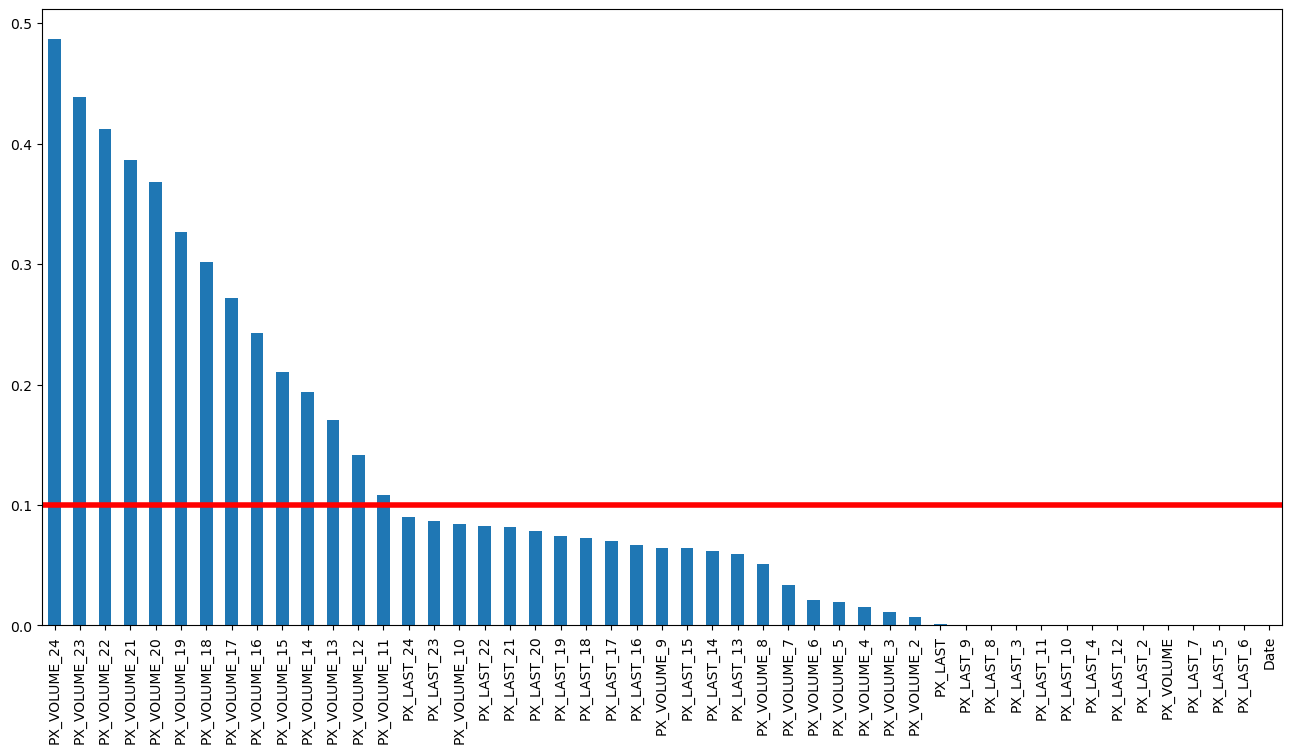

In [75]:
fig,ax=plt.subplots(figsize=(16,8))
df_agg.isna().mean().sort_values(ascending=False).plot(kind="bar",ax=ax)
ax.axhline(0.1,color="red",lw=4)

In [76]:
df_agg.shape

(5152, 49)

In [87]:
price_cols = [x for x in df_agg.columns if "LAST" in x]
df_subset = df_agg[["Date"] + price_cols[:12]]
df_subset.index = df_subset["Date"]
df_subset = df_subset.drop(columns=["Date"])
print(f"Shape before dropping nulls, {df_subset.shape}")
df_subset = df_subset.dropna()
print(f"Shape after dropping nulls, {df_subset.shape}")

Shape before dropping nulls, (5152, 12)
Shape after dropping nulls, (5148, 12)


<AxesSubplot: xlabel='Date'>

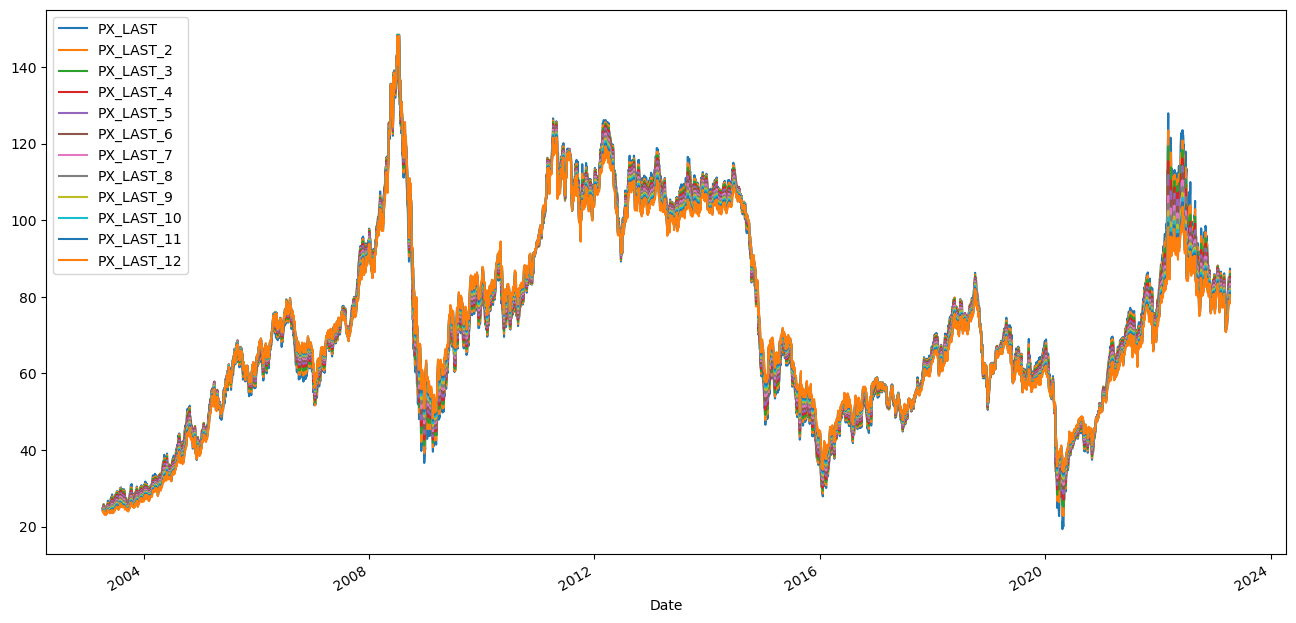

In [90]:
fig,ax=plt.subplots(figsize=(16,8))
df_subset.plot(ax=ax)